In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import legacy as legacy_optimizer
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import legacy as legacy_optimizer
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


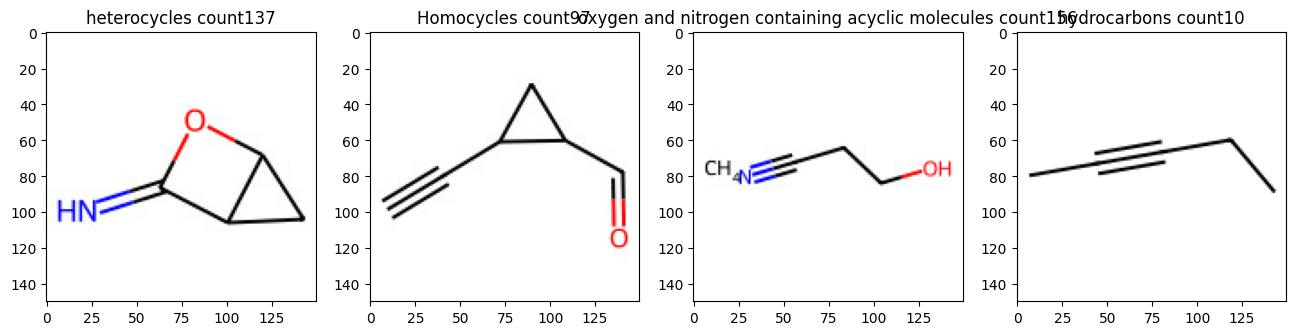

In [ ]:
data_dir = "/content/gdrive/MyDrive/images data 4 classes"

classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

fig, axes = plt.subplots(nrows=1, ncols=len(classes), figsize=(4*len(classes), 4))

for i, cls in enumerate(classes):
    class_path = os.path.join(data_dir, cls)
    class_files = os.listdir(class_path)
    
    img_path = os.path.join(class_path, class_files[0])
    img = mpimg.imread(img_path)
    
    axes[i].imshow(img)
    axes[i].set_title(cls)
    
plt.show()

In [ ]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img    #/content/gdrive/MyDrive/Images 4 agu done/Homocycles count97

data_dir = "/content/gdrive/MyDrive/DATA IMAGES"

target_size = (150, 150)
max_images_per_class = 200

datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False)

for cls in os.listdir(data_dir):
    cls_path = os.path.join(data_dir, cls)
    if not os.path.isdir(cls_path):
        continue

    num_images = len(os.listdir(cls_path))

    if num_images >= max_images_per_class:
        continue

    num_augmentations = max_images_per_class - num_images

    for i in range(num_augmentations):
        img_file = random.choice(os.listdir(cls_path))
        img_path = os.path.join(cls_path, img_file)
        img = load_img(img_path, target_size=target_size)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        j = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=cls_path, save_prefix='aug', save_format='jpg'):
            j += 1
            if j >= 1:
                break

print("Augmentation completed.")


Augmentation completed.


In [ ]:
batch_size = 50
img_width, img_height, img_num_channels = 150, 150, 3
loss_function = categorical_crossentropy
no_classes = 4
no_epochs = 10
verbosity = 1
class_name= ""

In [ ]:
data_generator = ImageDataGenerator(rescale=1./255)

classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
file_list = []
label_list = []
for idx, class_name in enumerate(classes):
    path = os.path.join(data_dir, class_name)
    for f in os.listdir(path):
        if f.endswith('.jpg') or f.endswith('.png'):
            file_list.append(os.path.join(path, f))
            label_list.append(idx)

label_array = np.array(label_list)
label_array = tf.keras.utils.to_categorical(label_array, num_classes=no_classes)

file_list = np.array(file_list)
data_array = np.zeros((len(file_list), img_width, img_height, img_num_channels))
for i, f in enumerate(file_list):
    img = tf.keras.preprocessing.image.load_img(f, target_size=(img_width, img_height))
    img_arr = tf.keras.preprocessing.image.img_to_array(img)
    data_array[i,:,:,:] = img_arr


In [ ]:
num_classes = 4
class_names = ['Homecycles','  Heterocycles',' Oxygen','  Hydrocarbons']                
    




Fold 1:
Epoch 1/10
12/12 [==============================] - 4s 38ms/step - loss: 2.1322 - accuracy: 0.3719
Epoch 2/10
12/12 [==============================] - 0s 34ms/step - loss: 0.6842 - accuracy: 0.7875
Epoch 3/10
12/12 [==============================] - 0s 33ms/step - loss: 0.1508 - accuracy: 0.9734
Epoch 4/10
12/12 [==============================] - 0s 33ms/step - loss: 0.0714 - accuracy: 0.9781
Epoch 5/10
12/12 [==============================] - 0s 33ms/step - loss: 0.0191 - accuracy: 0.9953
Epoch 6/10
12/12 [==============================] - 0s 33ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 0s 33ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 8/10
12/12 [==============================] - 0s 34ms/step - loss: 3.6280e-04 - accuracy: 1.0000
Epoch 9/10
12/12 [==============================] - 0s 32ms/step - loss: 1.1445e-04 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 12ms/step
Classification report:
    

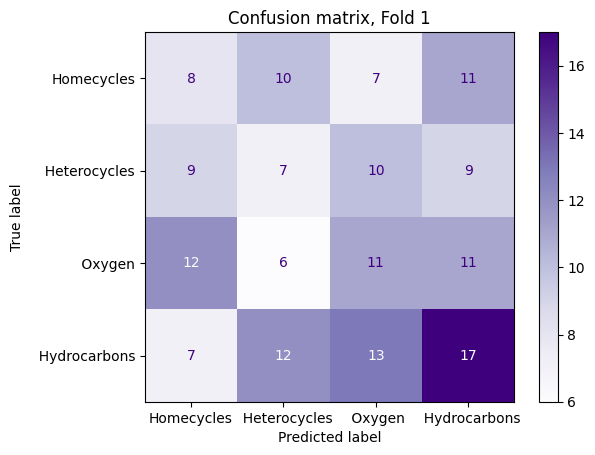

Score for fold 1: loss of 0.1627524048089981; accuracy of 97.50000238418579%


Fold 2:
Epoch 1/10
12/12 [==============================] - 2s 38ms/step - loss: 1.4736 - accuracy: 0.3984
Epoch 2/10
12/12 [==============================] - 0s 33ms/step - loss: 0.4551 - accuracy: 0.8656
Epoch 3/10
12/12 [==============================] - 0s 32ms/step - loss: 0.0727 - accuracy: 0.9812
Epoch 4/10
12/12 [==============================] - 0s 37ms/step - loss: 0.0082 - accuracy: 0.9984
Epoch 5/10
12/12 [==============================] - 1s 40ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 1s 40ms/step - loss: 2.9409e-04 - accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 1s 40ms/step - loss: 1.3661e-04 - accuracy: 1.0000
Epoch 8/10
12/12 [==============================] - 1s 38ms/step - loss: 7.0775e-05 - accuracy: 1.0000
Epoch 9/10
12/12 [==============================] - 1s 39ms/step - loss: 5.0331e-05 - accuracy: 1.0000
Epoch 

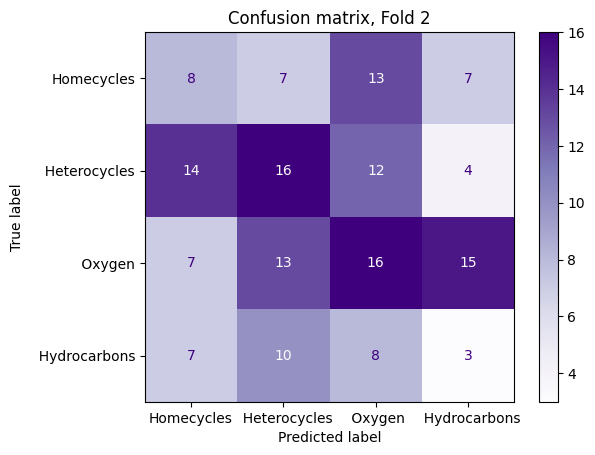

Score for fold 2: loss of 0.1576177328824997; accuracy of 98.1249988079071%


Fold 3:
Epoch 1/10
12/12 [==============================] - 3s 38ms/step - loss: 3.1398 - accuracy: 0.2969
Epoch 2/10
12/12 [==============================] - 0s 33ms/step - loss: 0.8366 - accuracy: 0.7047
Epoch 3/10
12/12 [==============================] - 0s 34ms/step - loss: 0.2819 - accuracy: 0.9031
Epoch 4/10
12/12 [==============================] - 0s 33ms/step - loss: 0.0628 - accuracy: 0.9797
Epoch 5/10
12/12 [==============================] - 0s 34ms/step - loss: 0.0173 - accuracy: 0.9953
Epoch 6/10
12/12 [==============================] - 0s 34ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 0s 33ms/step - loss: 6.6852e-04 - accuracy: 1.0000
Epoch 8/10
12/12 [==============================] - 0s 34ms/step - loss: 2.3001e-04 - accuracy: 1.0000
Epoch 9/10
12/12 [==============================] - 0s 33ms/step - loss: 8.8138e-05 - accuracy: 1.0000
Epoch 10/10

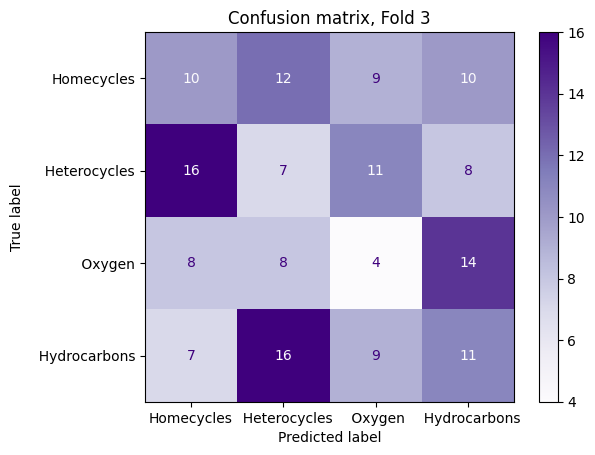

Score for fold 3: loss of 0.050779957324266434; accuracy of 98.1249988079071%


Fold 4:
Epoch 1/10
12/12 [==============================] - 4s 39ms/step - loss: 1.6457 - accuracy: 0.3328
Epoch 2/10
12/12 [==============================] - 0s 33ms/step - loss: 0.7531 - accuracy: 0.7812
Epoch 3/10
12/12 [==============================] - 0s 34ms/step - loss: 0.1560 - accuracy: 0.9578
Epoch 4/10
12/12 [==============================] - 0s 34ms/step - loss: 0.0220 - accuracy: 0.9953
Epoch 5/10
12/12 [==============================] - 0s 33ms/step - loss: 0.0052 - accuracy: 0.9984
Epoch 6/10
12/12 [==============================] - 0s 33ms/step - loss: 0.0031 - accuracy: 0.9984
Epoch 7/10
12/12 [==============================] - 0s 34ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/10
12/12 [==============================] - 0s 34ms/step - loss: 5.8662e-04 - accuracy: 1.0000
Epoch 9/10
12/12 [==============================] - 0s 33ms/step - loss: 1.3642e-04 - accuracy: 1.0000
Epoch 10/10
4

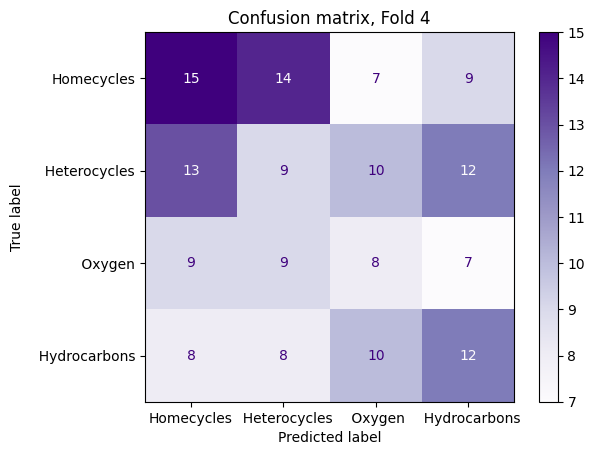

Score for fold 4: loss of 0.1405310332775116; accuracy of 96.875%


Fold 5:
Epoch 1/10
12/12 [==============================] - 2s 40ms/step - loss: 1.5497 - accuracy: 0.3969
Epoch 2/10
12/12 [==============================] - 0s 34ms/step - loss: 0.5266 - accuracy: 0.8219
Epoch 3/10
12/12 [==============================] - 0s 36ms/step - loss: 0.1055 - accuracy: 0.9766
Epoch 4/10
12/12 [==============================] - 1s 38ms/step - loss: 0.0118 - accuracy: 0.9984
Epoch 5/10
12/12 [==============================] - 1s 38ms/step - loss: 0.0067 - accuracy: 0.9984
Epoch 6/10
12/12 [==============================] - 1s 41ms/step - loss: 8.8625e-04 - accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 0s 36ms/step - loss: 3.6242e-04 - accuracy: 1.0000
Epoch 8/10
12/12 [==============================] - 1s 40ms/step - loss: 1.4825e-04 - accuracy: 1.0000
Epoch 9/10
12/12 [==============================] - 0s 34ms/step - loss: 8.3130e-05 - accuracy: 1.0000
Epoch 10/10
4/4 [

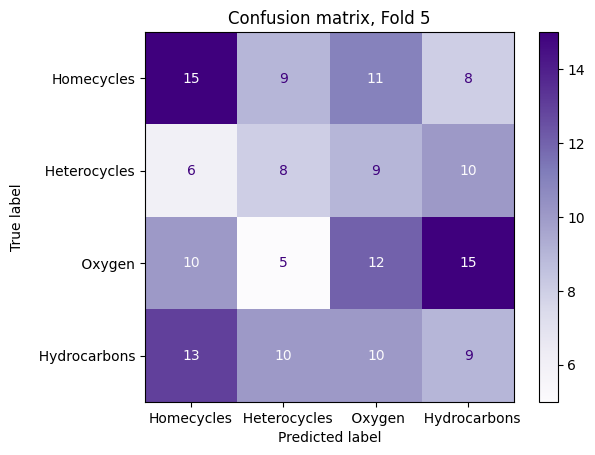

Score for fold 5: loss of 0.24238498508930206; accuracy of 96.875%


********************************
Average scores across all folds:
> Accuracy: 97.5 (+- 0.5590164612560685)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
scores_per_fold = []
for train_index, val_index in kfold.split(data_array):
    print('\n')
    print(f'Fold {fold_no}:')
    x_train, x_val = data_array[train_index], data_array[val_index]
    y_train, y_val = label_array[train_index], label_array[val_index]
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, img_num_channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=loss_function,
                  optimizer='Adam',
                  metrics=['accuracy']) 

    model.fit(data_generator.flow(x_train, y_train, batch_size=batch_size),
              steps_per_epoch=len(x_train) / batch_size,
              epochs=no_epochs,
              verbose=verbosity)
    
    y_pred = model.predict(data_generator.flow(x_val, batch_size=batch_size)).argmax(axis=-1)
    y_true = y_val.argmax(axis=-1)
    
    report = classification_report(y_true, y_pred)
    print('Classification report:')
    print(report)
    
    cm = confusion_matrix(y_true, y_pred, labels=range(num_classes))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    

    disp.plot(cmap=plt.cm.Purples) 
    plt.y_pred= ['Homecycles', 'Heterocycles ', 'oxygen and nitrogen', 'hydrocarbons']    
    plt.y_true= ['Homecycles', 'Heterocycles ', 'oxygen and nitrogen', 'hydrocarbons']
    plt.title(f'Confusion matrix, Fold {fold_no}')
    plt.show()
   # hyp, ref = trainer.evaluate_f1_score()
    
    scores = model.evaluate(data_generator.flow(x_val, y_val, batch_size=batch_size), verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    fold_no += 1
    scores_per_fold.append(scores[1] * 100)

print('\n')
print('********************************')
print('Average scores across all folds:')
print(f'> Accuracy: {np.mean(scores_per_fold)} (+- {np.std(scores_per_fold)})')
